In [2]:
%matplotlib inline

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

## Data loading

In [7]:
parties_names = pd.read_csv('./data/cik/cik_parties_04.04.2021.txt', sep=';', header=None)

In [255]:
parties_names

,0,1
0,1,ПП ВМРО – БЪЛГАРСКО НАЦИОНАЛНО ДВИЖЕНИЕ
1,2,"НИЕ, ГРАЖДАНИТЕ (ПП КОАЛИЦИЯ ЗА ТЕБ БЪЛГАРИЯ, ..."
2,3,Български национален съюз – НД
3,4,БСП за БЪЛГАРИЯ
4,5,ВЪЗРАЖДАНЕ
5,6,ПП АБВ
6,7,АТАКА
7,8,КОНСЕРВАТИВНО ОБЕДИНЕНИЕ НА ДЕСНИЦАТА /ПП КОД/
8,9,Движение за права и свободи - ДПС
9,10,БЪЛГАРСКА ПРОГРЕСИВНА ЛИНИЯ


In [10]:
sections_locations = pd.read_csv('./data/cik/sections_04.04.2021.txt', sep=';', header=None)

In [22]:
nsi_stats = pd.read_excel('./data/consolidated_data.xlsx', sheet_name='bednost_liniya')

In [37]:
cik_results = pd.read_csv('./data/cik/votes_04.04.2021.txt', sep=';', header=None, engine='python')

In [40]:
cik_results.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,10100001,1,1,7,5,2.0,2,0,0,0.0,...,58,24.0,30,0,0,0.0,31.0,0.0,0.0,0.0
1,10100002,1,1,11,9,2.0,2,2,2,0.0,...,38,18.0,30,1,0,1.0,31.0,0.0,0.0,0.0
2,10100003,1,1,9,9,0.0,2,0,0,0.0,...,39,29.0,30,0,0,0.0,31.0,0.0,0.0,0.0
3,10100004,1,1,9,5,4.0,2,0,0,0.0,...,32,14.0,30,0,0,0.0,31.0,0.0,0.0,0.0
4,10100005,1,1,12,8,4.0,2,0,0,0.0,...,21,18.0,30,0,0,0.0,31.0,0.0,0.0,0.0


In [87]:
original_results = cik_results.iloc[:,3::4]
original_results.fillna(0, inplace=True)

In [88]:
machine_results = cik_results.iloc[:,5::4]
machine_results.fillna(0, inplace=True)

In [89]:
ballot_results = cik_results.iloc[:,4::4]
ballot_results.fillna(0, inplace=True)

In [90]:
original_results.columns = np.arange(len(original_results.columns))
machine_results.columns = np.arange(len(machine_results.columns))
ballot_results.columns = np.arange(len(ballot_results.columns))

In [91]:
new_results = machine_results.add(ballot_results,fill_value=0)

In [94]:
nsi_stats

,Oblast,Liniya,Procent,Procent_lisheniya
0,Благоевград,4855,19.6,19.5
1,Бургас,5450,29.0,21.9
2,Варна,5760,24.0,20.8
3,Велико Търново,5009,25.0,25.5
4,Видин,3568,23.0,27.0
5,Враца,4395,24.5,25.7
6,Габрово,4761,12.3,12.7
7,Добрич,5238,20.0,19.7
8,Кърджали,4833,21.1,20.5
9,Кюстендил,5296,24.8,9.3


In [100]:
admin_loc = cik_results.iloc[:,1]

In [174]:
consolidated_results = pd.concat([admin_loc, original_results],axis=1)

In [175]:
consolidated_results.columns = np.arange(len(consolidated_results.columns))

In [176]:
consolidated_results

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,7,0,0,77,4,1,0,0,0,...,0,1,36,1,0,0,118,82,0,0.0
1,1,11,2,0,50,5,0,0,1,0,...,0,0,25,0,0,0,125,56,1,0.0
2,1,9,0,1,48,2,1,2,1,1,...,0,1,17,0,1,0,134,68,0,0.0
3,1,9,0,0,73,2,2,0,0,0,...,1,0,35,1,0,1,151,46,0,0.0
4,1,12,0,0,54,6,1,0,0,1,...,0,0,40,0,0,1,118,39,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,32,7,1,0,36,44,1,0,2,1,...,0,0,4,2,1,0,53,162,2,0.0
12937,32,2,0,0,16,43,0,1,0,8,...,0,0,2,1,0,0,18,85,0,0.0
12938,32,1,0,0,13,16,1,1,1,6,...,0,0,2,1,0,0,13,46,1,0.0
12939,32,8,1,0,48,35,2,6,7,32,...,1,0,2,2,1,0,58,120,1,0.0


In [213]:
data_cleared = pd.DataFrame()
for idx in range(32):
    tmp = consolidated_results.loc[consolidated_results[0] == idx+1, :].sum()
    data_cleared = data_cleared.append(consolidated_results.loc[consolidated_results[0] == idx+1, :].sum(), ignore_index=True)

In [214]:
data_cleared.iloc[15,:] = data_cleared.iloc[15,:] + data_cleared.iloc[16,:] # combining both Plovdiv's results

In [215]:
data_cleared.drop(labels=16, inplace=True)

In [216]:
data_cleared.iloc[21,:] = data_cleared.iloc[21,:] + data_cleared.iloc[22,:] + data_cleared.iloc[23,:] # combining Sofia's results

In [217]:
data_cleared.drop(labels=[23,24], inplace=True)

In [218]:
data_cleared.reset_index(inplace=True)

In [219]:
data_cleared.drop(labels='index', axis=1, inplace=True)

In [220]:
data_cleared.drop(labels=0, axis=1, inplace=True)

In [221]:
data_cleared.drop(labels=28, inplace=True)

### Messy but data is cleared and ready for further processing

I want to keep only the interesting parties: 1,4,9,11,14,18,28,29

In [246]:
data_analysis = pd.concat([data_cleared.iloc[:,[0,3,8,10,13,17,27,28]], nsi_stats.iloc[:,2:]], axis=1)

In [247]:
data_analysis

,1,4,9,11,14,18,28,29,Procent,Procent_lisheniya
0,10107.0,19286.0,20811.0,7825.0,3209.0,4597.0,53615.0,22958.0,19.6,19.5
1,7477.0,24555.0,22082.0,12338.0,4942.0,10115.0,44124.0,26344.0,29.0,21.9
2,11797.0,22242.0,11156.0,17270.0,5053.0,10342.0,56904.0,37963.0,24.0,20.8
3,4006.0,21432.0,6442.0,5878.0,2227.0,4268.0,23387.0,20336.0,25.0,25.5
4,1115.0,8023.0,3433.0,1874.0,746.0,1239.0,12953.0,5836.0,23.0,27.0
5,2917.0,12753.0,8107.0,3356.0,2118.0,3080.0,25869.0,13828.0,24.5,25.7
6,1682.0,7758.0,1818.0,2667.0,1354.0,2885.0,15899.0,9785.0,12.3,12.7
7,2395.0,13769.0,6003.0,3929.0,1787.0,3249.0,19585.0,12014.0,20.0,19.7
8,345.0,5754.0,44599.0,1491.0,551.0,778.0,10825.0,3775.0,21.1,20.5
9,2498.0,10849.0,1036.0,2583.0,1365.0,3409.0,17693.0,9742.0,24.8,9.3


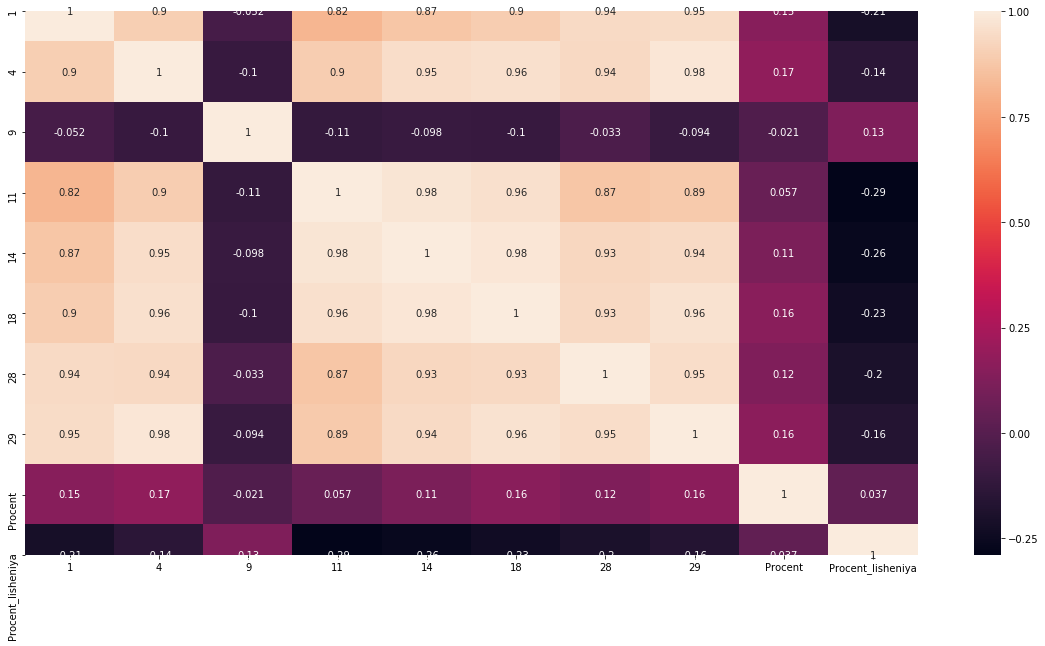

In [254]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data_analysis.corr(), annot=True)

Data shows some interesting conclusions:
- For areas in which 9 (DPS) has won most votes other parties get much less votes, i.e. it is not proportional. 
- For areas in which there is low percentage of people in poverty - the vote goeas to 11 (Da Bulgaria)
- For areas in which there is a high percentage of poeple that have difficulties fullfiling their monthly budget - vote goes to 9 (DPS)

Next step is to add educational info. 